## Observation on data

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/covid-data/Covid.csv


In [2]:
df = pd.read_csv('/kaggle/input/covid-data/Covid.csv')

In [3]:
df.head()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [4]:
df.shape

(230, 13)

In [5]:
df.sample(5)

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
50,51,Jordan,"1,746,997","14,122",NaN,"1,731,007","1,868",59,"169,597","1,371","17,201,885","1,669,945","10,300,869"
69,70,Nepal,"999,712","12,018",NaN,"986,617","1,077",NaN,"33,075",398,"5,936,702","196,413","30,225,582"
76,77,Saudi Arabia,"816,389","9,351",NaN,"803,546","3,492",32,"22,776",261,"44,321,147","1,236,470","35,844,909"
16,17,Iran,"7,548,320","144,421",NaN,"7,325,370","78,529",157,"87,748","1,679","54,095,556","628,851","86,022,837"
26,27,Malaysia,"4,838,872","36,369",NaN,"4,777,329","25,174",43,"145,832","1,096","64,604,259","1,947,021","33,181,072"


In [6]:
df.isnull().sum()

#                       0
Country,\nOther         0
Total\nCases            0
Total\nDeaths           5
New\nDeaths           227
Total\nRecovered       16
Active\nCases          15
Serious,\nCritical     83
Tot Cases/\n1M pop      2
Deaths/\n1M pop         7
Total\nTests           16
Tests/\n1M pop         16
Population              2
dtype: int64

## Drop unnecessary col

 total 230 rows and in col 'New\nDeaths' 227 are missing val. drop this col.

In [7]:
df = df.drop(['New\nDeaths','Country,\nOther','Tot Cases/\n1M pop','Deaths/\n1M pop', 'Tests/\n1M pop', 'Total\nTests', 'Population'], axis=1)


In [8]:
df.shape

(230, 6)

## Rename Columns

In [9]:
df.columns

Index(['#', 'Total\nCases', 'Total\nDeaths', 'Total\nRecovered',
       'Active\nCases', 'Serious,\nCritical'],
      dtype='object')

In [10]:
df.rename(columns={ 'Total\nCases': 'TotalCases',
                    'Total\nDeaths': 'TotalDeaths', 'Total\nRecovered': 'TotalRecovered',
                    'Active\nCases': 'ActiveCases', 'Serious,\nCritical': 'SeriousCritical',
                  }, inplace=True)

In [11]:
df.head(5)

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical
0,1,"98,166,904","1,084,282","94,962,112","2,120,510","2,970"
1,2,"44,587,307","528,629","44,019,095","39,583",698
2,3,"35,342,950","155,078","34,527,115","660,757",869
3,4,"34,706,757","686,027","33,838,636","182,094","8,318"
4,5,"33,312,373","149,948","32,315,200","847,225","1,406"


In [12]:
df.isnull().sum()

#                   0
TotalCases          0
TotalDeaths         5
TotalRecovered     16
ActiveCases        15
SeriousCritical    83
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   #                230 non-null    int64 
 1   TotalCases       230 non-null    object
 2   TotalDeaths      225 non-null    object
 3   TotalRecovered   214 non-null    object
 4   ActiveCases      215 non-null    object
 5   SeriousCritical  147 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.9+ KB


## Modify datatype

In [14]:
df.columns

Index(['#', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'SeriousCritical'],
      dtype='object')

In [15]:
columns_to_convert = [ 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'SeriousCritical']

# Remove commas and convert to integers
for column in columns_to_convert:
    # Ensure the column is treated as string before replacing commas and converting
    df[column] = pd.to_numeric(df[column].astype(str).str.replace(',', ''), errors='coerce').astype('Float64')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                230 non-null    int64  
 1   TotalCases       230 non-null    Float64
 2   TotalDeaths      225 non-null    Float64
 3   TotalRecovered   214 non-null    Float64
 4   ActiveCases      215 non-null    Float64
 5   SeriousCritical  147 non-null    Float64
dtypes: Float64(5), int64(1)
memory usage: 12.0 KB


In [17]:
df.sample(5)

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical
75,76,821162.0,9910.0,810181.0,1071.0,<NA>
9,10,20948470.0,387163.0,19979763.0,581544.0,2300.0
229,230,9.0,2.0,7.0,0.0,<NA>
113,114,206083.0,2991.0,196406.0,6686.0,131.0
180,181,18154.0,148.0,17969.0,37.0,<NA>


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

## Handling outliers

### TotalCases - col

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


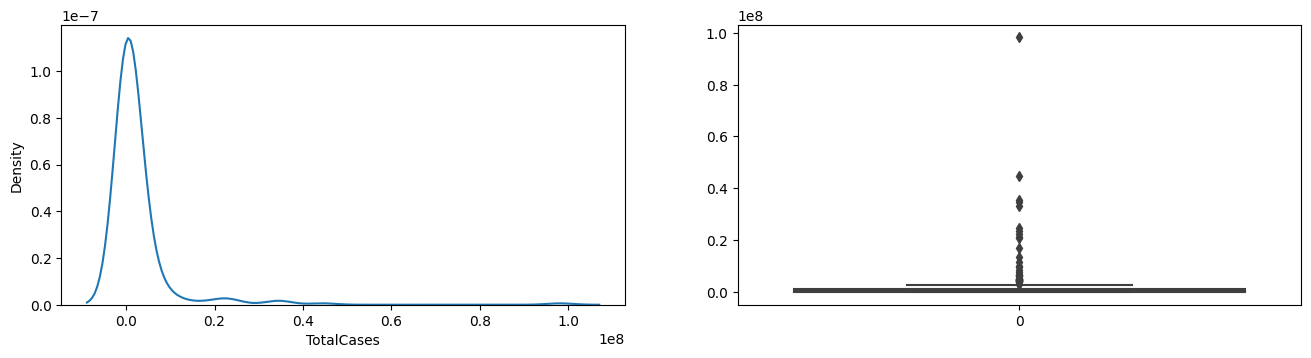

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['TotalCases'])
plt.subplot(2,2,2)
sns.boxplot(df['TotalCases'])

plt.show()

## By Winsorization

### Finding the IQR for TotalCases

In [20]:
percentile25 = df['TotalCases'].quantile(0.25)
percentile75 = df['TotalCases'].quantile(0.75)
print("percentile75:",percentile75)
iqr = percentile75 - percentile25
print("iqr:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:",upper_limit)
print("Lower limit:",lower_limit)

percentile75: 1256286.0
iqr: 1232637.0
Upper limit: 3105241.5
Lower limit: -1825306.5


### Find outliers

In [21]:
df[df['TotalCases'] > upper_limit]

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical
0,1,98166904.0,1084282.0,94962112.0,2120510.0,2970.0
1,2,44587307.0,528629.0,44019095.0,39583.0,698.0
2,3,35342950.0,155078.0,34527115.0,660757.0,869.0
3,4,34706757.0,686027.0,33838636.0,182094.0,8318.0
4,5,33312373.0,149948.0,32315200.0,847225.0,1406.0
5,6,24769101.0,28406.0,24013461.0,727234.0,352.0
6,7,23621952.0,189919.0,23347871.0,84162.0,146.0
7,8,22432803.0,177054.0,21779604.0,476145.0,141.0
8,9,21229216.0,44678.0,20380089.0,804449.0,204.0
9,10,20948470.0,387163.0,19979763.0,581544.0,2300.0


In [22]:
df[df['TotalCases'] < lower_limit]

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical


capping

In [23]:
new_df_cap = df.copy()

new_df_cap['TotalCases'] = np.where(
    new_df_cap['TotalCases'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['TotalCases'] < lower_limit,
        lower_limit,
        new_df_cap['TotalCases']
    )
)

In [24]:
new_df_cap.shape

(230, 6)

## Comparing before and after Winsorization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


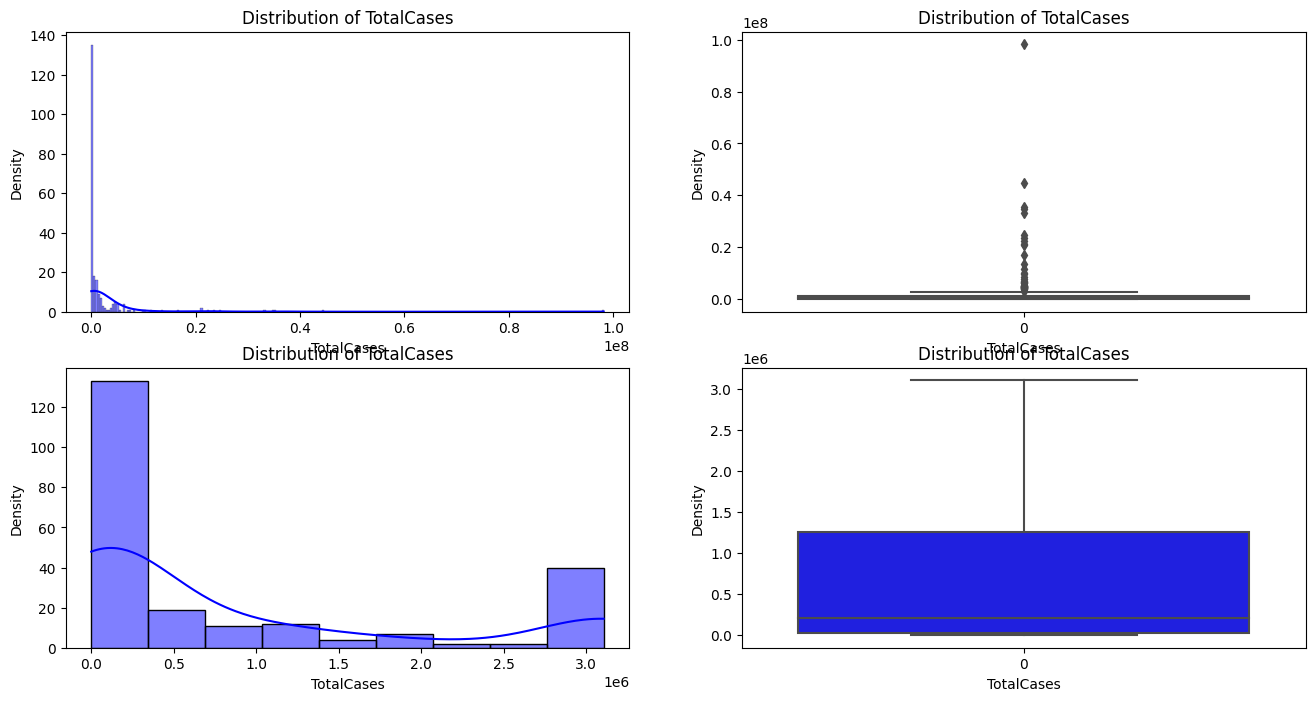

In [25]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df['TotalCases'], kde=True, color='b')
plt.title('Distribution of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Density')


#plt.subplot(2,2,1)
#sns.distplot(df['TotalCases'])

plt.subplot(2,2,2)
sns.boxplot(df['TotalCases'], color='b')
plt.title('Distribution of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Density')


plt.subplot(2,2,3)
sns.histplot(new_df_cap['TotalCases'], kde=True, color='b')
plt.title('Distribution of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Density')

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['TotalCases'], color='b')
plt.title('Distribution of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Density')


plt.show()

In [26]:
df = new_df_cap

In [27]:
df.head()

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical
0,1,3105241.5,1084282.0,94962112.0,2120510.0,2970.0
1,2,3105241.5,528629.0,44019095.0,39583.0,698.0
2,3,3105241.5,155078.0,34527115.0,660757.0,869.0
3,4,3105241.5,686027.0,33838636.0,182094.0,8318.0
4,5,3105241.5,149948.0,32315200.0,847225.0,1406.0


## By FunctionTransformer

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


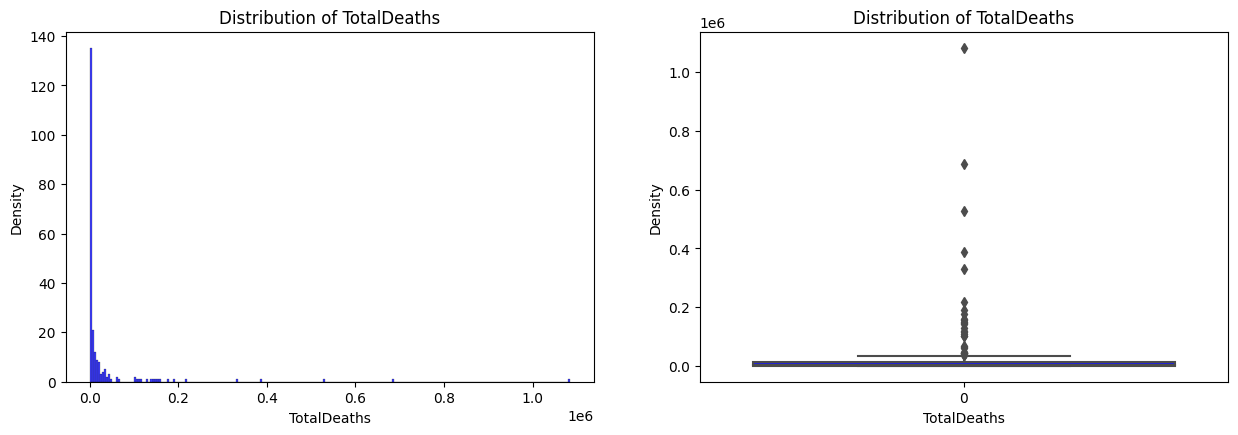

In [28]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(df['TotalDeaths'], kde=False, color='b')
plt.title('Distribution of TotalDeaths')
plt.xlabel('TotalDeaths')
plt.ylabel('Density')

plt.subplot(2,2,2)
sns.boxplot(df['TotalDeaths'], color='b')
plt.title('Distribution of TotalDeaths')
plt.xlabel('TotalDeaths')
plt.ylabel('Density')

plt.show()

In [29]:
print("Skewness: ", df['TotalDeaths'].skew())

Skewness:  7.083746708979543


> right  skewed data

In [30]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)

In [31]:
df['TotalDeaths']=transformer.transform(df['TotalDeaths'])

In [32]:
df['TotalDeaths'].skew()

-0.2287522248044566

##  After FunctionTransformer

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


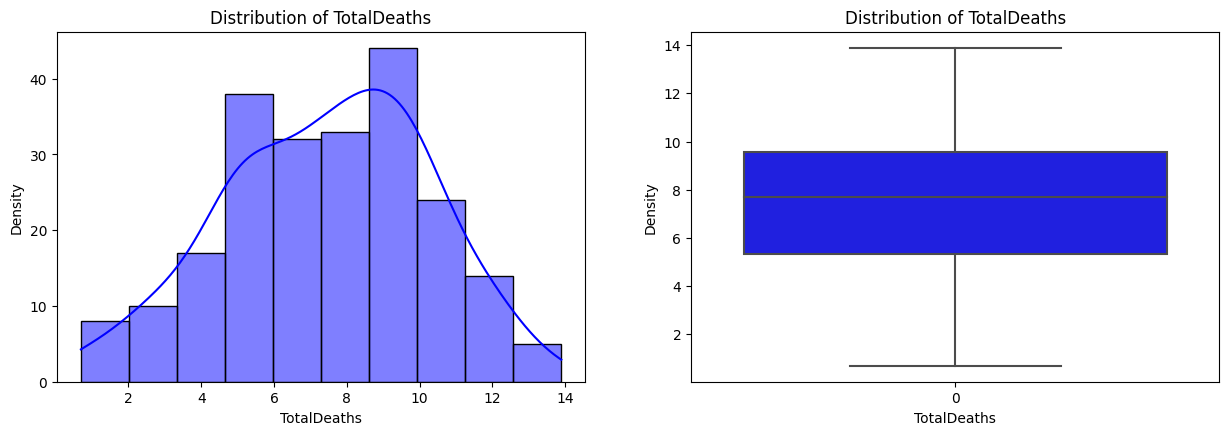

In [33]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(df['TotalDeaths'], kde=True, color='b')
plt.title('Distribution of TotalDeaths')
plt.xlabel('TotalDeaths')
plt.ylabel('Density')

plt.subplot(2,2,2)
sns.boxplot(df['TotalDeaths'], color='b')
plt.title('Distribution of TotalDeaths')
plt.xlabel('TotalDeaths')
plt.ylabel('Density')

plt.show()

In [34]:
df.head()

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical
0,1,3105241.5,13.896429,94962112.0,2120510.0,2970.0
1,2,3105241.5,13.178044,44019095.0,39583.0,698.0
2,3,3105241.5,11.95169,34527115.0,660757.0,869.0
3,4,3105241.5,13.438674,33838636.0,182094.0,8318.0
4,5,3105241.5,11.918051,32315200.0,847225.0,1406.0


## By Zscore

In [35]:
df['SeriousCritical'].skew()

6.04765862422462

> right skewed data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(-16.805555555555557, 0.5, 'Density')

<Figure size 1500x1000 with 0 Axes>

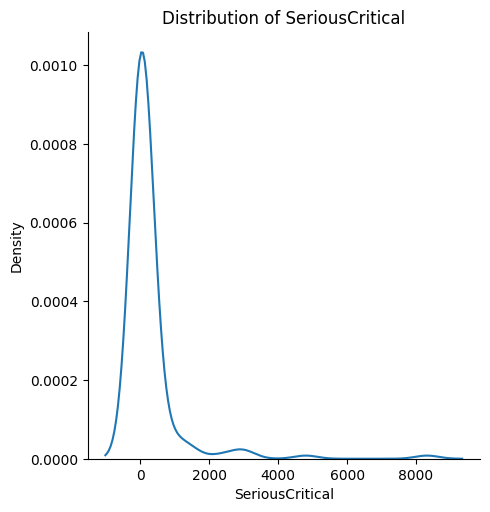

In [36]:
plt.figure(figsize=(15,10))

#plt.subplot(2,2,1)
sns.displot(df['SeriousCritical'], kind="kde")
plt.title('Distribution of SeriousCritical')
plt.xlabel('SeriousCritical')
plt.ylabel('Density')

#plt.show()

In [37]:
print("Mean value of cgpa",df['SeriousCritical'].mean())
print("Std value of cgpa",df['SeriousCritical'].std())
print("Min value of cgpa",df['SeriousCritical'].min())
print("Max value of cgpa",df['SeriousCritical'].max())

Mean value of cgpa 270.2244897959184
Std value of cgpa 922.6982008257636
Min value of cgpa 1.0
Max value of cgpa 8318.0


### Finding the boundary values

In [38]:
print("Highest allowed",df['SeriousCritical'].mean() + 3*df['SeriousCritical'].std())
print("Lowest allowed",df['SeriousCritical'].mean() - 3*df['SeriousCritical'].std())

Highest allowed 3038.319092273209
Lowest allowed -2497.870112681372


In [39]:
new_df = df[(df['SeriousCritical'] > 8.80) | (df['SeriousCritical'] < 5.11)]
new_df

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical
0,1,3105241.5,13.896429,94962112.0,2120510.0,2970.0
1,2,3105241.5,13.178044,44019095.0,39583.0,698.0
2,3,3105241.5,11.95169,34527115.0,660757.0,869.0
3,4,3105241.5,13.438674,33838636.0,182094.0,8318.0
4,5,3105241.5,11.918051,32315200.0,847225.0,1406.0
...,...,...,...,...,...,...
211,212,6380.0,3.610918,6321.0,23.0,4.0
213,214,5460.0,1.94591,5444.0,10.0,1.0
216,217,3865.0,2.564949,3848.0,5.0,4.0
217,218,3430.0,2.639057,2703.0,714.0,3.0


In [40]:
df['SeriousCritical_zscore'] = (df['SeriousCritical'] - df['SeriousCritical'].mean())/df['SeriousCritical'].std()
df.head()

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,SeriousCritical_zscore
0,1,3105241.5,13.896429,94962112.0,2120510.0,2970.0,2.925957
1,2,3105241.5,13.178044,44019095.0,39583.0,698.0,0.463614
2,3,3105241.5,11.95169,34527115.0,660757.0,869.0,0.64894
3,4,3105241.5,13.438674,33838636.0,182094.0,8318.0,8.722002
4,5,3105241.5,11.918051,32315200.0,847225.0,1406.0,1.230928


In [41]:
df[(df['SeriousCritical_zscore'] > 3) | (df['SeriousCritical_zscore'] < -3)]

,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,SeriousCritical_zscore
3,4,3105241.5,13.438674,33838636.0,182094.0,8318.0,8.722002
17,18,3105241.5,12.707048,6353953.0,400470.0,4798.0,4.907103
21,22,3105241.5,11.674534,5335940.0,836193.0,3086.0,3.051676


In [42]:
df = df[(df['SeriousCritical_zscore'] < 3) & (df['SeriousCritical_zscore'] > -3)]

In [43]:
df['SeriousCritical'].skew()

4.355269907733461

while befor skewness is "6.04765862422462"

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(-25.555555555555557, 0.5, 'Density')

<Figure size 1500x1000 with 0 Axes>

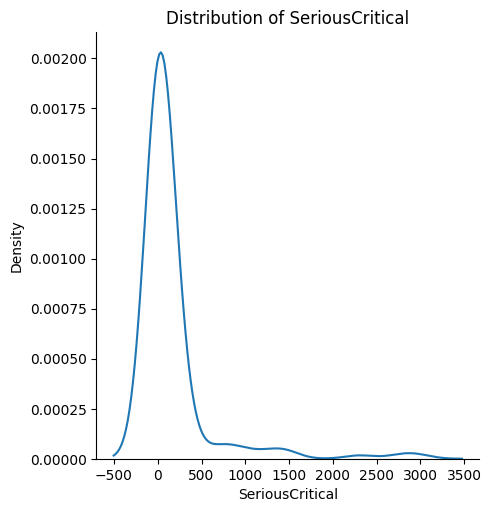

In [44]:
plt.figure(figsize=(15,10))

#plt.subplot(2,2,1)
sns.displot(df['SeriousCritical'], kind="kde")
plt.title('Distribution of SeriousCritical')
plt.xlabel('SeriousCritical')
plt.ylabel('Density')

#plt.show()

### still it improves it's scale